In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [119]:
def e_parse(s):
    """
    Takes in a string and outputs the first, uninterrupted string of digits (including decimals). 
    """
    e = ''
    for i in range(len(s)):
        if s[i].isdigit() or s[i] == '.':
            e += s[i]
        else:
            return e
    return e

In [120]:
eiso = pd.read_excel('Eiso data.xlsx')
eiso['GRB Name'] = 'GRB' + eiso['GRB Name'].astype(str)
eiso['Eiso'] = eiso['Eiso'].astype(str)
eiso['Eiso'] = eiso['Eiso'].str.strip()

In [121]:
eiso_lst = eiso['Eiso'].to_list()
#creates list of uncorrected eiso values
eiso_list = []
for e_iso in eiso_lst:
    e = e_parse(e_iso)
    eiso_list.append(e)
eiso['Eiso'] = eiso_list
eiso['Eiso'] = eiso['Eiso'].astype(float)
eiso = eiso.sort_values(['Eiso'])

In [135]:
cpl_swift = pd.read_csv('cpl_swift')

In [137]:
eiso_GRBs = pd.merge(cpl_swift, eiso, on= 'GRB Name')
eiso_GRBs = eiso_GRBs.drop(columns =['T90_y'])

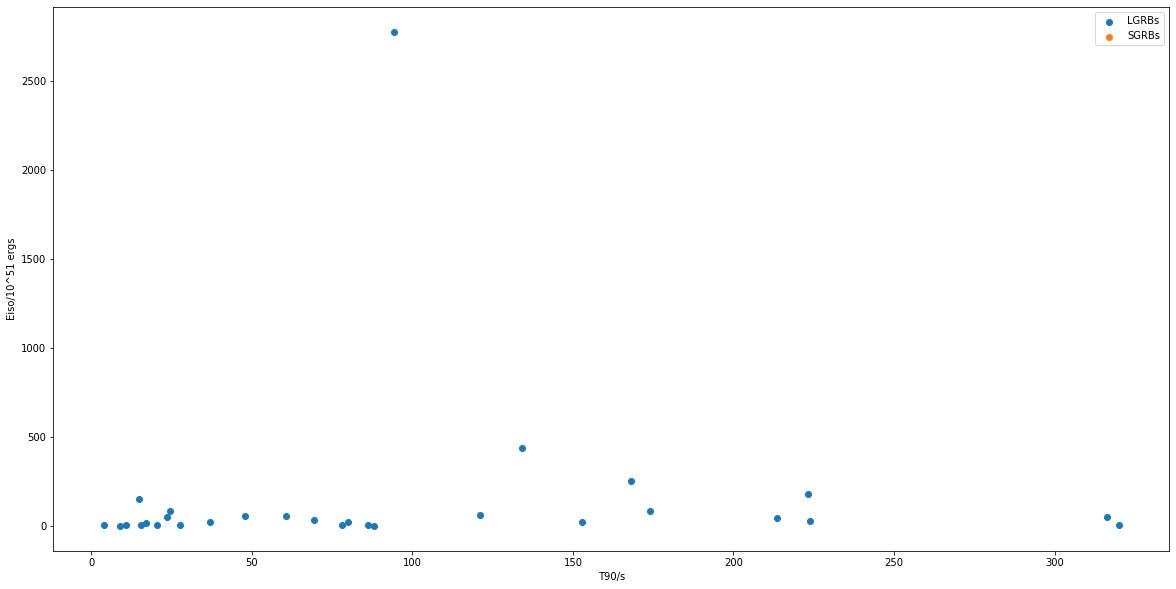

In [153]:
plt.figure(figsize=(20,10)) #sets figure size
LGRBs = eiso_GRBs.loc[(eiso_GRBs['T90_x']> 2)]
SGRBs = eiso_GRBs.loc[(eiso_GRBs['T90_x'] < 2)]

plt.scatter(LGRBs['T90_x'], LGRBs['Eiso'])
plt.scatter(SGRBs['T90_x'], SGRBs['Eiso'])

plt.xlabel('T90/s')
plt.ylabel("Eiso/10^51 ergs")
plt.legend(['LGRBs','SGRBs'])

plt.show()

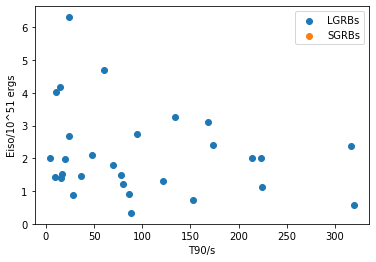

In [154]:
plt.scatter(LGRBs['T90_x'], LGRBs['z'])
plt.scatter(SGRBs['T90_x'], SGRBs['z'])

plt.xlabel('T90/s')
plt.ylabel("Eiso/10^51 ergs")
plt.legend(['LGRBs','SGRBs'])

plt.show()

In [159]:
eiso_GRBs.to_excel('EisoGRBs.xlsx')